## Python statistics essential training - 04_crossvalidation

Standard imports

In [2]:
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!).

In [3]:
gapminder = pd.read_csv('gapminder.csv')

In [4]:
gdata = gapminder.query('year == 1985')

Refactored plotting so that it works on arbitrary datasets.

In [14]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata):
    plotdata(data)

    size, colors = sc(data)
    plt.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Previous 3 model formulas:

In [6]:
f_region = 'babies_per_woman ~ -1 + region'
f_survival = 'babies_per_woman ~ -1 + region + age5_surviving'
f_survival_pop = 'babies_per_woman ~ -1 + region + age5_surviving:region + population'

In [7]:
shuffled = gdata.sample(len(gdata))

In [8]:
# Divide the rows in 2

training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[len(gdata)//2:]

In [12]:
survival = smf.ols(f_survival, data=training).fit()

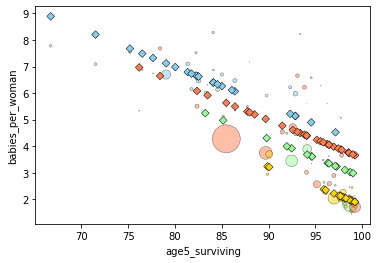

In [15]:
plotfit(survival,training)

In [16]:
survival.mse_resid

1.1061692404821384

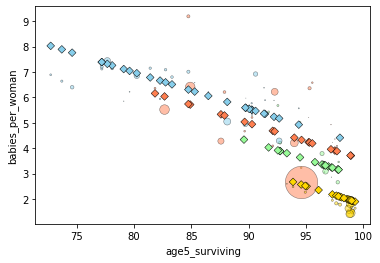

In [17]:
plotfit(survival,testing)

Calculate MSE for testing data needs some calculations. We need to use the fitted model to predict the test datafit the model on the test data 

In [20]:
resid = survival.predict(testing) - testing.babies_per_woman          # yhat - y
df = len(testing) - survival.df_model - 1                             # degrees of freedom = number of obs - model parameters -1
np.sum(resid**2) / df

0.8510210850529126

Automate the whole process above and since shyffling is random, we iterate the whole process and calculate the average MSE's --> Cross Validation

In [21]:
def cross_validate(data,formula,response,n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training, testing = shuffled.iloc[:len(data)//2], shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(formula, data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid**2) / df
        
        ret.append(mse)
    
    return np.mean(ret)

In [22]:
cross_validate(gdata,f_region,'babies_per_woman')

1.6060865687996775

In [23]:
cross_validate(gdata,f_survival,'babies_per_woman')

1.057506865709538

In [24]:
cross_validate(gdata,f_survival_pop,'babies_per_woman')

1.1909242696846685

The model with the cross validation MSE of 1.05 seems to better fit this data compared to other two models.